## Module Imports

This section imports all the essential Python libraries required throughout the project. Each module plays a key role in handling data, building models, and visualizing results.

### Libraries and Their Roles:

* **`numpy`**

  Used for numerical operations such as handling arrays and mathematical computations.

* **`pandas`**
  
  Helps in data manipulation, loading CSV files, creating and modifying DataFrames, and cleaning datasets.

* **`matplotlib.pyplot`**
  
  Used for creating basic visualizations including bar plots, line charts, scatter plots, and histograms.

* **`seaborn`**
  
  Builds on `matplotlib` and is used for advanced visualizations like heatmaps, pairplots, and aesthetically pleasing statistical plots.

* **`sklearn.preprocessing.StandardScaler`**
  
  Normalizes features by removing the mean and scaling to unit variance, often required before model training.

* **`sklearn.model_selection.train_test_split`**
  
  Splits the dataset into training and testing sets for evaluation of model performance.

* **`sklearn.svm.SVC`**
  
  Implements the Support Vector Classifier used for building classification models.

* **`sklearn.metrics`**
  
  Includes:

    * `accuracy_score`: Measures how often predictions match labels.
    * `confusion_matrix`: Summarizes true vs. predicted classifications.
    * `classification_report`: Provides precision, recall, F1-score for each class.

* **`pickle`**
  
  Used for saving (serializing) and loading trained models so they can be reused without retraining.




In [1]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt      
import seaborn as sns                
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC                   
import pickle                                         


##  Data Loading Class
This class (`DataLoading`) is responsible for:
- Reading the CSV file into a DataFrame
- Providing methods to check the dataset’s shape, column names, info, summary stats, and preview rows.


In [2]:
class DataLoading:
    """
    DataLoading Class
    -----------------
    This class handles:
    - Loading the dataset into a pandas DataFrame
    - Providing initial data exploration and understanding

    Purpose:
    Allows users to inspect the data structure, check its basic properties, 
    and understand the data types, shapes, and sample values before moving to preprocessing.

    Attributes:
        file_path (str): The file path to the dataset (CSV format)
        df (DataFrame): The loaded pandas DataFrame
    """

    def __init__(self, file_path):
        """
        Parameters:
            file_path : str (required)
                The path to the CSV file containing the dataset.

        Description:
            Initializes the DataLoading class and loads the dataset into a pandas DataFrame.
        """
        self.df = pd.read_csv(file_path)

    def return_duplicate_data(self):
        """
        Description:
            Returns a copy of the loaded dataset.

        Purpose:
            Allows duplication of the dataset for backup, parallel processing,
            or safe transformations without affecting the original.
        """
        duplicated_df = self.df.copy()
        return duplicated_df

    def get_shape(self, df):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset whose shape is to be determined.

        Description:
            Returns the shape (rows, columns) of the dataset.

        Purpose:
            Helps understand the size of the dataset.
        """
        if df is not None:
            return df.shape
        else:
            raise ValueError("Dataset not found")

    def lookup(self, df, method, size):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset to apply the lookup method on.
            method : str
                The method to use ('head', 'tail', or 'sample').
            size : int
                The number of rows to return.

        Description:
            Returns a subset of the dataset using the specified method:
            - 'head': first N rows
            - 'tail': last N rows
            - 'sample': random N rows

        Purpose:
            Useful for quickly viewing different parts of the dataset.
        """
        if method == 'head':
            return df.head(size)
        elif method == 'tail':
            return df.tail(size)
        elif method == "sample":
            return df.sample(size)
        else:
            print("Method not supported")

    def get_columns(self, df):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset to extract column names from.

        Description:
            Returns a list of column names in the dataset.

        Purpose:
            Useful for knowing available features and selecting columns for analysis.
        """
        return df.columns.tolist()

    def get_info(self, df):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset whose information is to be displayed.

        Description:
            Prints dataset information including:
            - column names
            - data types
            - non-null counts
            - memory usage

        Purpose:
            Helps understand data types and missing value patterns.
        """
        return df.info()

    def get_description(self, df):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset to describe.

        Description:
            Returns summary statistics (count, mean, std, min, max, quartiles) for numeric columns.

        Purpose:
            Provides a quick statistical overview of the dataset.
        """
        return df.describe()


##  Data Preprocessing Class
This class (`DataPreprocessing`) is responsible for:
- Cleaning the dataset by handling duplicates, zero values, and null values.
- Providing methods to replace or fill missing data using mean, median, or mode.
- Ensuring the dataset is clean and ready for analysis or modeling.


In [3]:
class DataPreprocessing:
    """
    DataPreprocessing Class
    ----------------------
    This class handles:
    - Cleaning and preparing the dataset before modeling
    - Checking for duplicates, null values, zero values
    - Replacing or filling missing or invalid data

    Purpose:
    Ensures the data is clean, consistent, and ready for further analysis or modeling.
    All methods operate on external DataFrames passed as parameters.
    """

    def drop_duplicates(self, df, inplace=False):
        """
        Parameters:
        df : pandas.DataFrame
            The dataset to process.
        inplace : bool (default=False)
            Whether to drop duplicates in-place.

        Description:
        Drops duplicate rows from the dataset.

        Purpose:
        Removes redundant records that can bias the analysis or model.
        """
        if inplace:
            return df.drop_duplicates(inplace=True)
        else:
            return df.drop_duplicates()
        
    def rename_column(self, df, old_column, new_column, inplace=False):
        """
        Purpose:
            Renames a column in the provided DataFrame with optional in-place modification.

        Parameters:
            df : pandas DataFrame
                The DataFrame containing the column to rename.
            old_column : str
                The current name of the column to rename.
            new_column : str
                The new name to assign to the column.
            inplace : bool (default=False)
                If True, modifies the original DataFrame directly.
                If False, returns a new DataFrame with the column renamed.

        Returns:
            pandas DataFrame or None:
                - Returns a new DataFrame with renamed column if inplace is False.
                - Returns None if inplace is True (modifies original DataFrame).

        Raises:
            ValueError:
                If the old_column is not found in the DataFrame.
        """
        if old_column not in df.columns:
            raise ValueError(f"Column '{old_column}' not found in DataFrame.")

        if inplace:
            df.rename(columns={old_column: new_column}, inplace=True)
            return None
        else:
            return df.rename(columns={old_column: new_column}, inplace=False)

        

    def check_nulls(self, df):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset to inspect.

        Description:
            Checks for null (missing) values in each column.

        Purpose:
            Helps identify columns with missing data for further imputation.
        """
        return df.isnull().sum()

    def check_zeros(self, df, columns):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset to check.
            columns : list of str
                A list of column names to check for zero values.

        Description:
            Counts the number of zero values in each specified column.

        Purpose:
            Identifies potential missing or invalid data encoded as zero.
        """
        zero_counts = {}
        for col in columns:
            zero_counts[col] = (df[col] == 0).sum()
        return zero_counts

    def replace_zeros_with_null(self, df, columns):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset to update.
            columns : list of str
                Columns where zero values should be replaced with NaN.

        Description:
            Replaces zero values with NaN in the specified columns.

        Purpose:
            Prepares data for proper handling of missing values.
        """
        for col in columns:
            df[col] = df[col].replace(0, np.nan)
        return df

    def fill_null(self, df, column, method="mean"):
        """
        Parameters:
            df : pandas.DataFrame
                The dataset containing null values.
            column : str
                The column to fill missing values in.
            method : str (default="mean")
                The method to use for filling: 'mode', 'median', or 'mean'.

        Description:
            Fills null values in the specified column using the given method.
            Defaults to 'mean' if no method is specified.

        Purpose:
            Handles missing data using statistical imputation.

        Note:
            If an invalid method is provided, a warning is printed and None is returned.
        """
        if method == "mode":
            value = df[column].mode()[0]
            df[column] = df[column].fillna(value)
        elif method == "median":
            value = df[column].median()
            df[column] = df[column].fillna(value)
        elif method == "mean":
            value = df[column].mean()
            df[column] = df[column].fillna(value)
        else:
            print("Invalid method. Please choose from 'mode', 'median', or 'mean'.")
            return None


## Graphs Class
This class (`Graphs`) contains reusable methods for generating:
- Bar charts
- Pie charts
- Histograms (basic + distplot)
- Box plots
- Violin plots
- Line charts
- Scatter plots
- Count plots
- Swarm plots (for small datasets)
- Pair plots
- Correlation heatmaps



In [4]:
class Graphs:
    """
    Graphs Class
    ------------
    This class provides reusable and dynamic methods to generate various plots for exploratory data analysis (EDA).

    Purpose:
    Helps visualize data distributions, relationships, and patterns using matplotlib, seaborn, and pandas
    by taking all plotting configurations dynamically through parameters.
    """

    def plot_sns(self, data, kind, x=None, y=None, hue=None, color='blue', bins=20,
                 title='', xlabel='', ylabel='', figsize=(8, 6), palette='Set2', annot=False, fmt=".2f",
                 cmap='coolwarm', kde=True):
        """
        Parameters:
            data : DataFrame (required)
                The dataset to visualize.
            kind : str (required)
                Seaborn plot type: 'scatter', 'box', 'violin', 'count', 'swarm', 'dist', 'pair'.
            x, y : str (optional)
                Axis column names where required.
            hue : str (optional)
                Column for grouping.
            color : str (optional)
                Color for single-color plots.
            bins : int (optional)
                Bin count for histogram.
            title, xlabel, ylabel : str (optional)
                Titles and axis labels.
            figsize : tuple (optional)
                Plot size.
            palette : str (optional)
                Color palette for multi-color plots.
            annot : bool (optional)
                If True, show annotations (used in heatmap).
            fmt : str (optional)
                String format code (used in heatmap).
            cmap : str (optional)
                Color map (used in heatmap).
            kde : bool (optional)
                Whether to show KDE in distplot.

        Description:
            Generates seaborn plots based on provided parameters using beginner-friendly structure.

        Purpose:
            Makes seaborn plot generation easier to understand for beginners.
        """
        plt.figure(figsize=figsize)

        if kind == 'scatter':
            sns.scatterplot(data=data, x=x, y=y, hue=hue, color=color)
        elif kind == 'box':
            sns.boxplot(data=data, x=x, y=y, hue=hue, color=color)
        elif kind == 'violin':
            sns.violinplot(data=data, x=x, y=y, hue=hue, color=color)
        elif kind == 'count':
            sns.countplot(data=data, x=x, hue=hue, palette=palette)
        elif kind == 'swarm':
            sns.swarmplot(data=data, x=x, y=y, hue=hue, palette=palette)
        elif kind == 'dist':
            sns.histplot(data=data, x=x, hue=hue, color=color, bins=bins, kde=kde)
        elif kind == 'pair':
            sns.pairplot(data, hue=hue, palette=palette)
            plt.suptitle(title, y=1.02)
            return
        elif kind == 'heatmap':
            sns.heatmap(data.corr(), annot=annot, cmap=cmap, fmt=fmt)
        else:
            print("Unsupported seaborn plot type.")
            return

        plt.title(title)
        if xlabel: plt.xlabel(xlabel)
        if ylabel: plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()

    def plot_pandas(self, data, kind, column=None, aggfunc='value_counts', color='skyblue',
                    title='', xlabel='', ylabel='', figsize=(8, 6), autopct='%1.1f%%'):
        """
        Parameters:
            data : DataFrame (required)
                The dataset to visualize.
            kind : str (required)
                Pandas plot type: 'bar', 'pie', 'hist', 'line'.
            column : str (optional)
                Column for plotting.
            aggfunc : str (optional)
                Aggregation method (e.g., 'value_counts', 'sum', 'mean', 'min', 'max').
            color : str (optional)
                Plot color.
            title, xlabel, ylabel : str (optional)
                Plot title and axis labels.
            figsize : tuple (optional)
                Plot size.
            autopct : str (optional)
                Pie chart value formatting.

        Description:
            Generates dynamic pandas plots with support for aggregation.

        Purpose:
            Provides user-controlled aggregation and plot types.
        """
        plt.figure(figsize=figsize)
        if aggfunc == 'value_counts':
            plot_data = data[column].value_counts()
        else:
            plot_data = data.groupby(column).agg(aggfunc)[column] if column in data.columns else data.agg(aggfunc)

        if kind == 'pie':
            plot_data.plot(kind=kind, autopct=autopct)
        else:
            plot_data.plot(kind=kind, color=color)

        plt.title(title)
        if xlabel: plt.xlabel(xlabel)
        if ylabel: plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()

    def plot_matplotlib(self, x, y, kind='line', color='blue',
                        title='', xlabel='', ylabel='', figsize=(8, 6)):
        """
        Parameters:
            x, y : array-like (required)
                Data for x and y axes.
            kind : str (optional, default='line')
                Plot type: 'line', 'scatter'.
            color : str (optional)
                Color of the plot.
            title, xlabel, ylabel : str (optional)
                Title and axis labels.
            figsize : tuple (optional)
                Size of the plot.

        Description:
            Uses matplotlib to generate low-level plots.

        Purpose:
            Gives control to user for fine-tuned custom plots with matplotlib.
        """
        plt.figure(figsize=figsize)
        if kind == 'line':
            plt.plot(x, y, color=color)
        elif kind == 'scatter':
            plt.scatter(x, y, color=color)
        else:
            print("Unsupported matplotlib plot kind.")
            return

        plt.title(title)
        if xlabel: plt.xlabel(xlabel)
        if ylabel: plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()

    def plot_correlation_heatmap(self, data, title='Correlation Heatmap', figsize=(10, 8), cmap='coolwarm', annot=True, fmt=".2f"):
        """
        Parameters:
            data : DataFrame (required)
                The dataset for computing correlation.
            title : str (optional)
                Title of the heatmap.
            figsize : tuple (optional)
                Size of the heatmap.
            cmap : str (optional)
                Color map for heatmap.
            annot : bool (optional)
                Whether to annotate cells with values.
            fmt : str (optional)
                String format for annotations.

        Description:
            Generates a dynamic correlation heatmap from the dataset.

        Purpose:
            Visualizes correlation between numerical features.
        """
        plt.figure(figsize=figsize)
        sns.heatmap(data.corr(), annot=annot, cmap=cmap, fmt=fmt)
        plt.title(title)
        plt.tight_layout()
        plt.show()
    
    def plot_pairplot(self, data, columns=None, hue=None, palette='Set2'):
        """
        Parameters:
            data : pandas DataFrame (required)
            columns : list of str (optional)
                Columns to include in the pairplot. Defaults to all numeric columns.
            hue : str (optional)
                Column name to group by color.
            palette : str (optional)
                Seaborn color palette.

        Description:
            Generates a pairplot showing pairwise relationships.
        """
        if columns is None:
            columns = data.select_dtypes(include='number').columns
        sns.pairplot(data[columns], hue=hue, palette=palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()



##  UnivariateAnalysis Class
This class performs **univariate analysis** by:
- Calculating statistical measures (mean, median, mode, std, min, max, skewness, kurtosis)
- Generating visualizations (histogram, distplot, boxplot, violin plot, count plot)

It **inherits** from the Graphs class to reuse all plotting functions.


In [5]:
class UnivariateAnalysis(Graphs):
    """
    UnivariateAnalysis Class
    ------------------------
    Inherits from:
        Graphs class

    Purpose:
        Performs univariate analysis on dataset columns, providing:
        - Descriptive statistics (mean, median, mode, std, min, max, skewness, kurtosis)
        - Visualizations like histogram, boxplot, violin, distplot, countplot
    """

    def calculate_statistics(self, data, column, stat_type='mean'):
        """
        Parameters:
            data : DataFrame (required)
                The dataset containing the column.
            column : str (required)
                The numeric column to analyze.
            stat_type : str (required)
                The type of statistic to calculate. Options:
                - 'mean', 'median', 'mode', 'std', 'min', 'max', 'skew', 'kurt'

        Description:
            Calculates and returns a specific statistical value based on stat_type.

        Purpose:
            Provides one dynamic method to calculate different statistics based on user choice.
        """
        if stat_type == 'mean':
            result = data[column].mean()
        elif stat_type == 'median':
            result = data[column].median()
        elif stat_type == 'mode':
            result = list(data[column].mode())
        elif stat_type == 'std':
            result = data[column].std()
        elif stat_type == 'min':
            result = data[column].min()
        elif stat_type == 'max':
            result = data[column].max()
        elif stat_type == 'skew':
            result = data[column].skew()
        elif stat_type == 'kurt':
            result = data[column].kurtosis()
        else:
            print("Invalid stat_type. Choose from: mean, median, mode, std, min, max, skew, kurt")
            return None

        return result

    def visualize_univariate(self, data, column, 
                         use_sns=False, use_pandas=False, use_matplotlib=False,
                         sns_kinds=['dist', 'box'], 
                         pandas_kinds=['bar'], pandas_aggfunc='value_counts',
                         matplotlib_kinds=['line'],
                         color='blue', bins=20,
                         title_prefix='', xlabel='', ylabel=''):
        """
        Parameters:
            data : DataFrame (required)
                    Dataset containing the column to visualize.
            column : str (required)
                    Column name to perform univariate analysis on.
            use_sns : bool (optional, default=False)
                    Whether to use seaborn plots.
            use_pandas : bool (optional, default=False)
                    Whether to use pandas plots.
            use_matplotlib : bool (optional, default=False)
                    Whether to use matplotlib plots.
            sns_kinds : list (optional , default=['dist', 'box'])
                    List of seaborn plots to draw: 'scatter', 'box', 'violin', 'count', 'swarm', 'dist', 'pair'.
            pandas_kinds : list (optional , default=['bar'])
                    List of pandas plots: 'bar', 'pie', 'hist', 'line'.
            pandas_aggfunc : str (optional)
                    Aggregation function for pandas plot (e.g., 'value_counts', 'sum', 'mean', 'min', 'max').
            matplotlib_kinds : list (optional , default=['line'])
                    List of matplotlib plot kinds: 'line', 'scatter'.
            color : str (optional)
                    Color of the plots.
            bins : int (optional)
                    Bin count for distplot/histogram.
            title_prefix : str (optional)
                    Prefix for plot titles (e.g., 'Analysis of').
            xlabel, ylabel : str (optional)
                    Labels for x and y axes.

        Description:
            Dynamically generates seaborn, pandas, and matplotlib plots for univariate analysis.

        Purpose:
            Gives full control to the user to customize which charts to render for exploring a single column.
        """
        
        #Seaborn Plots
        if use_sns:
            for kind in sns_kinds:
                self.plot_sns(
                    data=data,
                    kind=kind,
                    x=column if kind in ['dist', 'hist'] else None,
                    y=column if kind in ['box', 'violin'] else None,
                    color=color,
                    bins=bins,
                    title=f'{title_prefix} {kind.title()} Plot of {column}',
                    xlabel=xlabel or column,
                    ylabel=ylabel or 'Frequency'
                )

        #Pandas Plots
        if use_pandas:
            for kind in pandas_kinds:
                self.plot_pandas(
                    data=data,
                    kind=kind,
                    column=column,
                    aggfunc=pandas_aggfunc,
                    color=color,
                    title=f'{title_prefix} {kind.title()} Plot of {column}',
                    xlabel=xlabel or column,
                    ylabel=ylabel or 'Count'
                )

        #Matplotlib Plots
        if use_matplotlib:
            for kind in matplotlib_kinds:
                self.plot_matplotlib(
                    x=data.index,
                    y=data[column],
                    kind=kind,
                    color=color,
                    title=f'{title_prefix} {kind.title()} Plot of {column}',
                    xlabel='Index',
                    ylabel=column
                )
    


##  BivariateAnalysis Class
This class performs **bivariate analysis** by:
- Calculating correlations between numeric features
- Plotting scatterplots, heatmaps, pairplots
- Performing groupby-based summaries and visualizations

It **inherits** from the Graphs class to reuse charting functions.


In [6]:
class BivariateAnalysis(Graphs):
    """
    BivariateAnalysis  Class
    ------------------------
    Inherits from:
        Graphs class

    Purpose:
        Performs bivariate analysis on pairs of dataset columns using dynamic, reusable graph methods.
        Includes:
        - Correlation matrix
        - Seaborn-based scatterplots, heatmaps, pairplots
        - Groupby summaries and visualizations
    """

    def calculate_correlation(self, data):
        """
        Parameters:
            data : pandas DataFrame (required)
                Dataset for correlation analysis.

        Description:
            Calculates and prints the correlation matrix of the dataset.
        """
        corr_matrix = data.corr()
        return corr_matrix

    def correlation_heatmap(self, data, title='Correlation Heatmap', figsize=(10, 8), cmap='coolwarm', annot=True, fmt=".2f"):
        """
        Parameters:
            data : pandas DataFrame (required)
            title : str (optional)
            figsize : tuple (optional)
            cmap : str (optional)
            annot : bool (optional)
            fmt : str (optional)

        Description:
            Dynamically generates a correlation heatmap using the Graphs class.
        """
        self.plot_correlation_heatmap(data, title=title, figsize=figsize, cmap=cmap, annot=annot, fmt=fmt)


    def plot_scatter_between(self, data, x_column, y_column, hue=None, color='green', title='', xlabel='', ylabel=''):
        """
        Parameters:
            data : pandas DataFrame (required)
            x_column : str (required)
            y_column : str (required)
            hue : str (optional)
            color : str (optional)
            title, xlabel, ylabel : str (optional)

        Description:
            Plots a scatterplot between two numerical columns using Seaborn.
        """
        self.plot_sns(data=data, kind='scatter', x=x_column, y=y_column, hue=hue,
                      color=color, title=title, xlabel=xlabel, ylabel=ylabel)

    def groupby_summary(self, data, groupby_column, target_column, aggfunc='mean'):
        """
        Parameters:
            data : pandas DataFrame (required)
            groupby_column : str (required)
            target_column : str (required)
            aggfunc : str (optional, default='mean')
                Aggregation type: 'mean', 'sum', 'max', 'min', etc.

        Description:
            Displays group-wise summary statistics of the target column.
        """
        grouped = data.groupby(groupby_column)[target_column].agg(aggfunc)
        return grouped

    def plot_groupby_chart(self, data, groupby_column, kind='bar', aggfunc='sum',
                           title='', xlabel='', ylabel='', color='skyblue'):
        """
        Parameters:
            data : pandas DataFrame (required)
            groupby_column : str (required)
            kind : str (optional)
                Chart type: 'bar', 'line', 'pie'
            aggfunc : str (optional)
                Aggregation: 'sum', 'mean', etc.
            title, xlabel, ylabel : str (optional)
            color : str (optional)

        Description:
            Uses Pandas plotting to show summarized group-by values.
        """
        self.plot_pandas(data=data, kind=kind, column=groupby_column,
                         aggfunc=aggfunc, color=color, title=title,
                         xlabel=xlabel, ylabel=ylabel)


##  Model Class
This class manages everything related to model development:
- Splitting data into train and test sets
- Checking if scaling is necessary and performing scaling
- Training a model (default is SVM)
- Making predictions
- Evaluating the model with accuracy, confusion matrix, and classification report


In [7]:
class Model:
    """
    Model Class
    -----------
    Purpose:
        Handles ML pipeline steps: data splitting, training, predicting, and evaluation.
        Supports optional feature scaling. Returns all results instead of printing them.
    """

    def __init__(self, df, target_column):
        """
        Parameters:
            df : pandas DataFrame
                The dataset.
            target_column : str
                The name of the target column.
        """
        self.df = df
        self.target = target_column
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.model = None
        self.scaler = None

    def split_data(self, test_size=0.2, random_state=42, scale=True):
        """
        Splits dataset into train/test and applies scaling if required.

        Parameters:
            test_size : float
                Portion of dataset for testing.
            random_state : int
                Seed for reproducibility.
            scale : bool
                If True, applies StandardScaler to features.

        Returns:
            tuple: X_train, X_test, y_train, y_test
        """
        X = self.df.drop(columns=[self.target])
        y = self.df[self.target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        if scale:
            self.scaler = StandardScaler()
            self.X_train = self.scaler.fit_transform(self.X_train)
            self.X_test = self.scaler.transform(self.X_test)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def train(self, model=None):
        """
        Trains the provided model or default linear SVM.

        Parameters:
            model : scikit-learn model (optional)
                A classifier instance. Default is SVC with linear kernel.

        Returns:
            Trained model
        """
        if model is None:
            model = SVC(kernel='linear')

        self.model = model.fit(self.X_train, self.y_train)
        return self.model

    def predict(self, X=None):
        """
        Makes predictions using the trained model.

        Parameters:
            X : array-like (optional)
                Data to predict on. If None, uses self.X_test.

        Returns:
            np.array: Predicted labels
        """
        if self.model is None:
            raise Exception("Model is not trained yet.")

        if X is None:
            X = self.X_test

        return self.model.predict(X)

    def evaluate(self):
        """
        Evaluates the trained model using test data.

        Returns:
            tuple: accuracy (float), confusion_matrix (array), classification_report (str)
        """
        y_pred = self.predict()
        accuracy = accuracy_score(self.y_test, y_pred)
        conf = confusion_matrix(self.y_test, y_pred)
        report = classification_report(self.y_test, y_pred)

        return accuracy, conf, report


## PickleHandler Class
This class manages:
- Saving trained models to `.pkl` files using pickle.
- Loading models back for later use.
- Making predictions using the loaded model.




In [8]:
class PickleHandler:
    """
    PickleHandler Class
    -------------------
    Purpose:
        Handles saving and loading of trained models using Python's pickle module.
        Supports making predictions using the loaded model.
    """

    def __init__(self):
        """
        Description:
            Initializes the PickleHandler with model set to None.
        """
        self.model = None

    def save_model(self, model, filename='saved_model.pkl'):
        """
        Method: save_model
        -------------------
        Purpose:
            Saves a trained model to a pickle (.pkl) file.

        Parameters:
            model : object
                Trained machine learning model to be saved.
            filename : str (default='saved_model.pkl')
                File path where the model will be saved.
        """
        with open(filename, 'wb') as file:
            pickle.dump(model, file)

    def load_model(self, filename='saved_model.pkl'):
        """
        Method: load_model
        ------------------
        Purpose:
            Loads a model from a saved pickle (.pkl) file.

        Parameters:
            filename : str (default='saved_model.pkl')
                Path to the pickle file containing the saved model.

        Returns:
            model : object
                Loaded machine learning model.
        """
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)
        return self.model

    def predict(self, X):
        """
        Method: predict
        ---------------
        Purpose:
            Makes predictions using the loaded model.

        Parameters:
            X : array-like or DataFrame
                Input data to make predictions on.

        Returns:
            predictions : array-like
                Model predictions on the input data.

        Raises:
            Exception if no model is loaded.
        """
        if self.model is None:
            raise Exception("No model loaded. Please load a model before predicting.")

        return self.model.predict(X)


## Output


In [9]:
loader = DataLoading("diabetes.csv")

In [10]:
df = loader.return_duplicate_data()

In [11]:
loader.get_columns(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [12]:
loader.get_description(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
loader.get_shape(df)

(768, 9)

In [14]:
loader.lookup(df,"sample",12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
325,1,157,72,21,168,25.6,0.123,24,0
401,6,137,61,0,0,24.2,0.151,55,0
710,3,158,64,13,387,31.2,0.295,24,0
241,4,91,70,32,88,33.1,0.446,22,0
455,14,175,62,30,0,33.6,0.212,38,1
330,8,118,72,19,0,23.1,1.476,46,0
470,1,144,82,40,0,41.3,0.607,28,0
134,2,96,68,13,49,21.1,0.647,26,0
490,2,83,65,28,66,36.8,0.629,24,0
548,1,164,82,43,67,32.8,0.341,50,0


In [15]:
loader.get_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
processor = DataPreprocessing()

In [17]:
processor.rename_column(df,"Outcome","Target",True)

In [18]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
processor.check_zeros(df,columns)

{'Glucose': np.int64(5),
 'BloodPressure': np.int64(35),
 'SkinThickness': np.int64(227),
 'Insulin': np.int64(374),
 'BMI': np.int64(11)}

In [19]:
processor.replace_zeros_with_null(df, columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [20]:
processor.check_nulls(df)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Target                        0
dtype: int64

In [21]:
processor.fill_null(df,"Glucose")
processor.fill_null(df,"BloodPressure","median")
processor.fill_null(df,"SkinThickness","mode")
processor.fill_null(df,"Insulin")
processor.fill_null(df,"BMI")

In [22]:
univarient = UnivariateAnalysis()

In [23]:
a = univarient.calculate_statistics(df,"BMI","mean")

In [24]:
print(a)

32.457463672391015


In [25]:
univarient.calculate_statistics(df,"Insulin","skew")

np.float64(3.019083661355125)

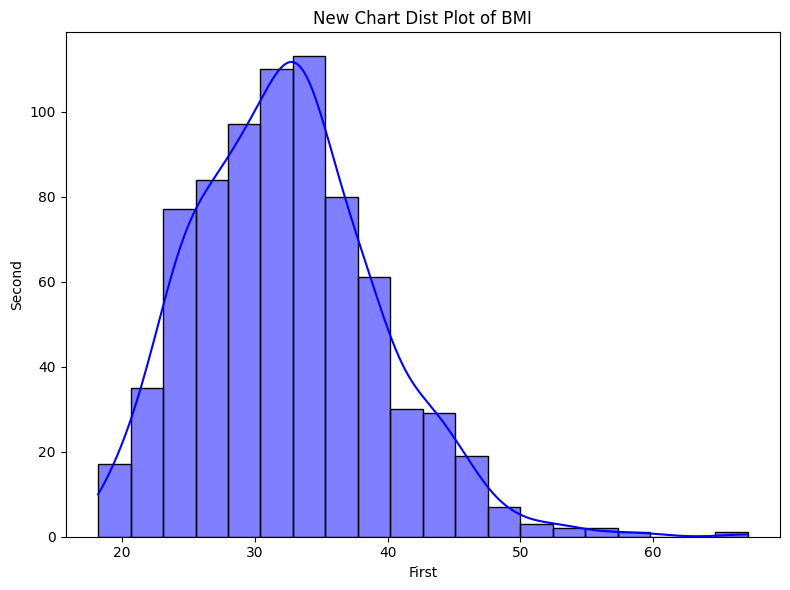

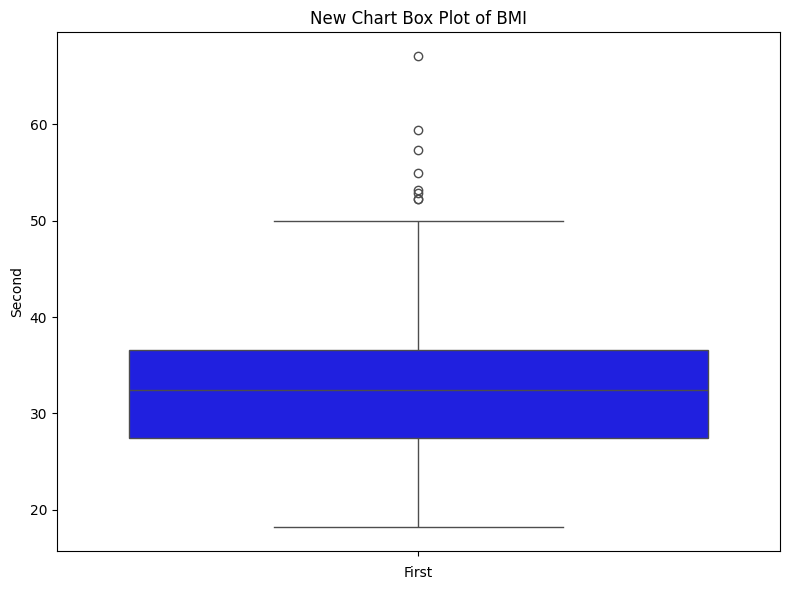

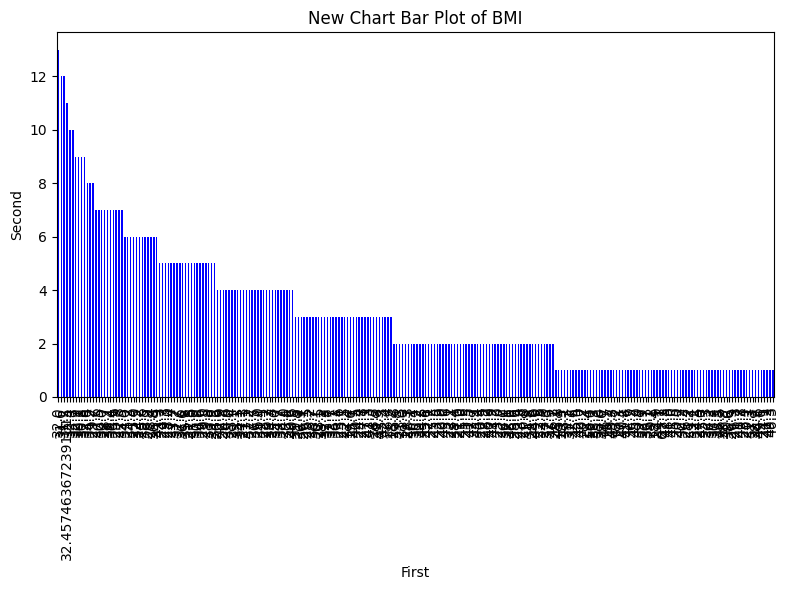

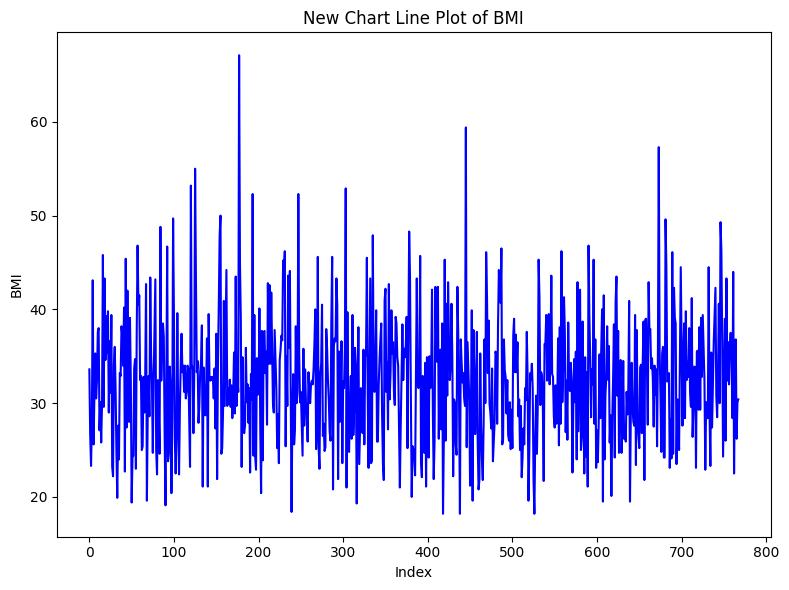

In [26]:
univarient.visualize_univariate(df,"BMI",True,True,True,title_prefix="New Chart",xlabel="First",ylabel="Second")

In [27]:
ba = BivariateAnalysis()

# Correlation matrix
corr = ba.calculate_correlation(df)
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
Pregnancies,1.000000,0.127911,0.208615,0.104428,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218557,0.196406,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208615,0.218557,1.000000,0.207999,0.072515,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.104428,0.196406,0.207999,1.000000,0.156438,0.522215,0.077395,0.158825,0.220678
Insulin,0.056027,0.420157,0.072515,0.156438,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281319,0.522215,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002378,0.077395,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324915,0.158825,0.136734,0.025519,0.033561,1.000000,0.238356
Target,0.221898,0.492928,0.165723,0.220678,0.214411,0.311924,0.173844,0.238356,1.000000


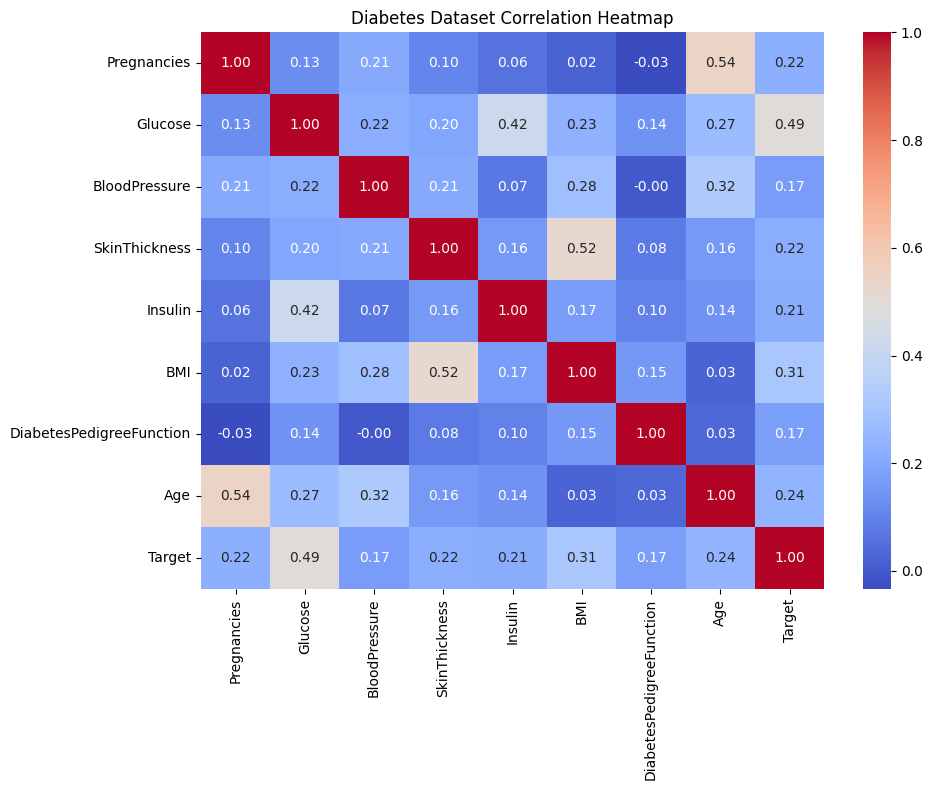

In [28]:
ba.correlation_heatmap(df, title='Diabetes Dataset Correlation Heatmap', figsize=(10, 8), cmap='coolwarm', annot=True, fmt=".2f")


In [29]:

# Groupby Outcome on Glucose
summary = ba.groupby_summary(df, 'Target', 'Glucose', 'mean')
summary


Target
0    110.710121
1    142.165573
Name: Glucose, dtype: float64

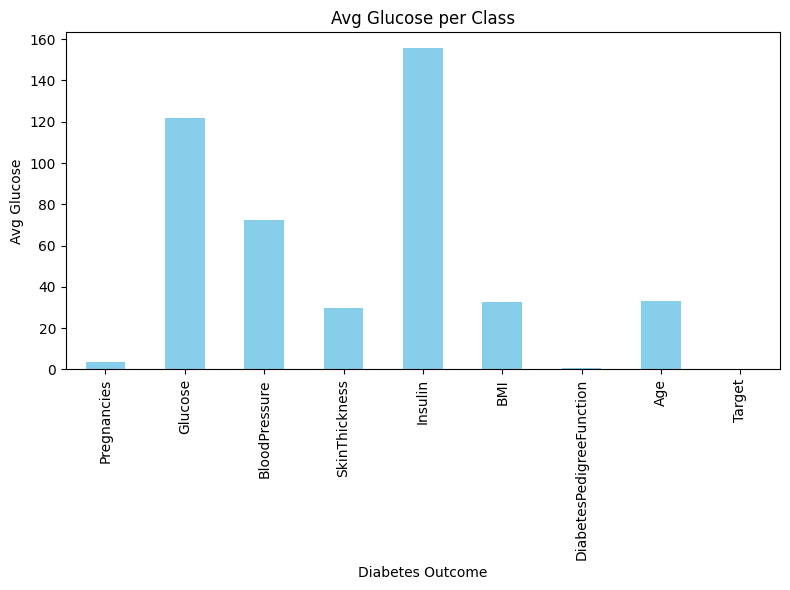

In [30]:

ba.plot_groupby_chart(
    data=df,
    groupby_column="Gulucose",
    kind='bar',
    aggfunc='mean',
    title='Avg Glucose per Class',
    xlabel='Diabetes Outcome',
    ylabel='Avg Glucose'
)


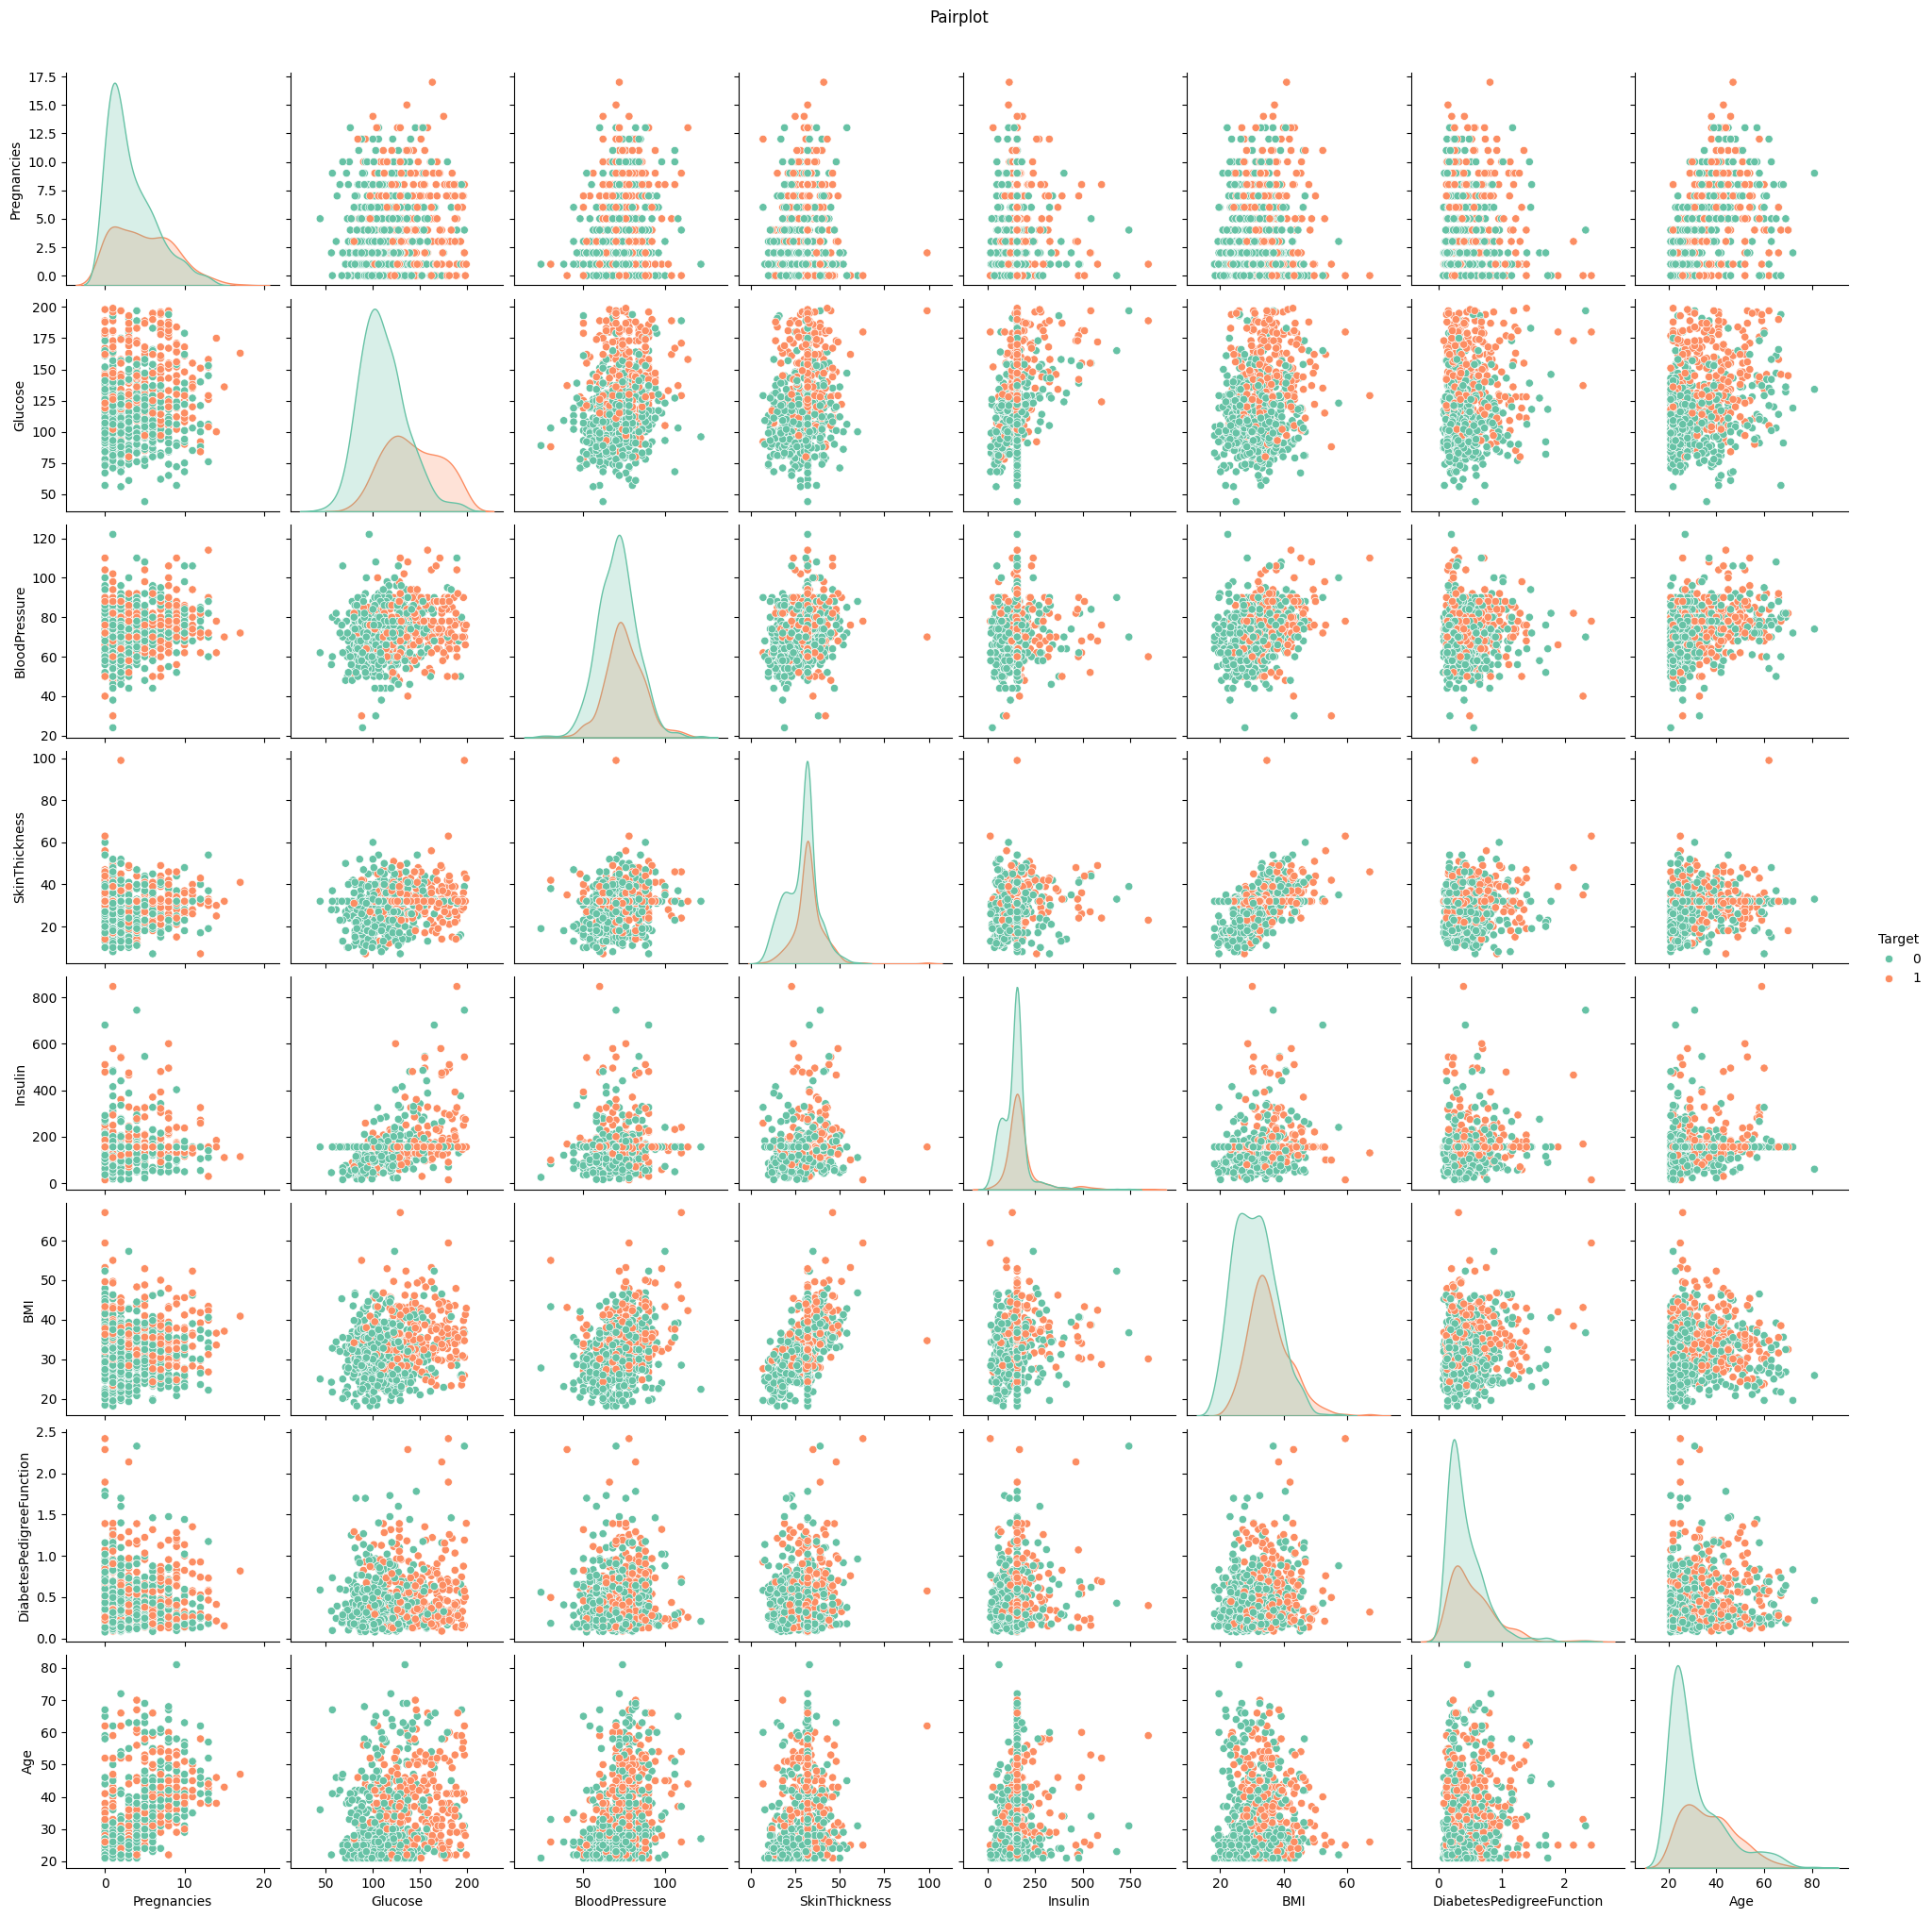

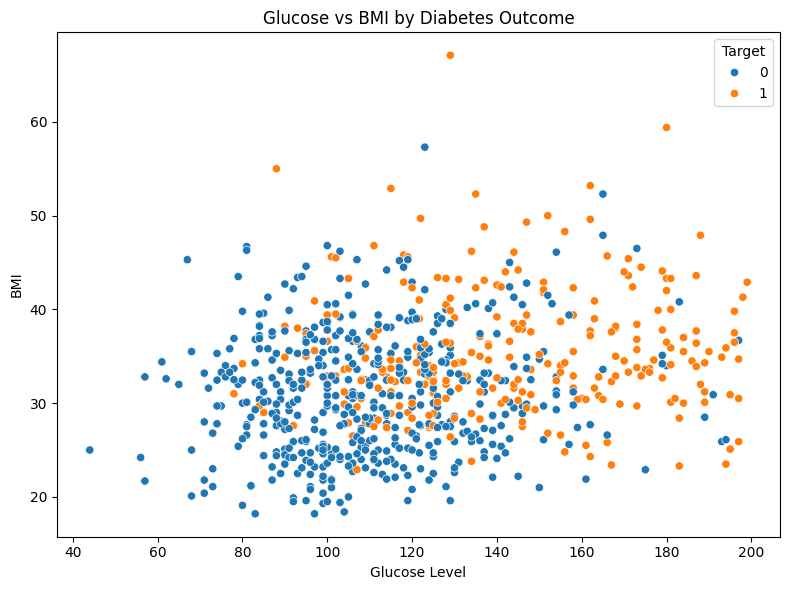

In [31]:
ba.plot_pairplot(df, hue='Target', palette='Set2')
ba.plot_scatter_between(
    data=df,
    x_column='Glucose',
    y_column='BMI',
    hue='Target',
    color='green',
    title='Glucose vs BMI by Diabetes Outcome',
    xlabel='Glucose Level',
    ylabel='BMI'
)

In [32]:

model_obj = Model(df, target_column='Target')


X_train, X_test, y_train, y_test = model_obj.split_data()

trained_model = model_obj.train()


accuracy, confusion, report = model_obj.evaluate()
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [33]:
ph = PickleHandler()


ph.save_model(trained_model, filename='model/diabetes2_model.pkl')





In [34]:
ph.load_model(filename='model/diabetes2_model.pkl')
predictions = ph.predict(X_test)
print("Sample Predictions:", predictions[:10])

Sample Predictions: [0 0 0 0 0 0 0 0 1 1]
